In [1]:
!pip install kaggle


In [2]:
!kaggle datasets download -d paultimothymooney/medical-speech-transcription-and-intent


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/medical-speech-transcription-and-intent
License(s): other
100% 5.27G/5.27G [01:08<00:00, 73.4MB/s]
100% 5.27G/5.27G [01:08<00:00, 82.2MB/s]


In [8]:
!unzip medical-speech-transcription-and-intent.zip

Streaming output truncated to the last 5000 lines.
  inflating: medical speech transcription and intent/Medical Speech, Transcription, and Intent/recordings/test/1249120_35154350_58959709.wav  
  inflating: medical speech transcription and intent/Medical Speech, Transcription, and Intent/recordings/test/1249120_35154350_61858707.wav  
  inflating: medical speech transcription and intent/Medical Speech, Transcription, and Intent/recordings/test/1249120_35154350_62723165.wav  
  inflating: medical speech transcription and intent/Medical Speech, Transcription, and Intent/recordings/test/1249120_35154350_67577535.wav  
  inflating: medical speech transcription and intent/Medical Speech, Transcription, and Intent/recordings/test/1249120_35154350_73842430.wav  
  inflating: medical speech transcription and intent/Medical Speech, Transcription, and Intent/recordings/test/1249120_35154350_74284558.wav  
  inflating: medical speech transcription and intent/Medical Speech, Transcription, and Int

In [3]:
!pip install speechrecognition pydub gensim nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 51.9 MB/s eta 0:00:00


Now using validation folder

In [21]:
import nltk # Make sure nltk is imported
from gensim.models import Word2Vec # Import Word2Vec from gensim.models

def train_word2vec(text):
    # Tokenize the text using word_tokenize from nltk.tokenize
    tokens = nltk.word_tokenize(text.lower())
    model = Word2Vec([tokens], vector_size=100, window=5, min_count=1, workers=4)
    return model

In [22]:
import os

In [23]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
!pip install SpeechRecognition
import os
import speech_recognition as sr

# Function to transcribe all audio files in a directory and aggregate text
def transcribe_all_audio_in_directory(directory):
    all_transcribed_text = []
    r = sr.Recognizer() # Create a recognizer instance
    for filename in os.listdir(directory):
        if filename.endswith(".wav"):  # Process only .wav files
            audio_file_path = os.path.join(directory, filename)
            # Perform audio to text conversion using SpeechRecognition library
            with sr.AudioFile(audio_file_path) as source:
                audio_data = r.record(source)
                try:
                    transcribed_text = r.recognize_google(audio_data)
                except sr.UnknownValueError:
                    print(f"Could not understand audio in {filename}")
                    transcribed_text = "" # Set to empty string if recognition fails
                except sr.RequestError as e:
                    print(f"Could not request results from Google Speech Recognition service; {e}")
                    transcribed_text = "" # Set to empty string if request fails
            if transcribed_text:
                all_transcribed_text.append(transcribed_text)
    return " ".join(all_transcribed_text)  # Join all transcriptions into one text

In [25]:
# Main execution
if __name__ == "__main__":
    train_directory = "Medical Speech, Transcription, and Intent/recordings/validate"  # Folder containing your training audio files

    # Convert all audio files to text
    aggregated_transcribed_text = transcribe_all_audio_in_directory(train_directory)
    print(f"Aggregated Transcribed Text: {aggregated_transcribed_text}")

    if aggregated_transcribed_text:
        # Train Word2Vec model on the aggregated text
        word2vec_model = train_word2vec(aggregated_transcribed_text)

        # Check vocabulary size for a simple accuracy metric
        vocabulary_size = len(word2vec_model.wv)
        print(f"Vocabulary Size: {vocabulary_size}")

        # Get vector for a user-defined word
        word = input("Enter the word to get its vector: ")
        if word in word2vec_model.wv:
            vector = word2vec_model.wv[word]
            print(f"Vector for '{word}': {vector}")
        else:
            print(f"'{word}' not in vocabulary.")

        # Find similar words
        similar_word = input("Enter a word to find similar words: ")
        if similar_word in word2vec_model.wv:
            similar_words = word2vec_model.wv.most_similar(similar_word, topn=5)
            print(f"Similar words to '{similar_word}':")
            for similar_word, similarity in similar_words:
                print(f"{similar_word}: {similarity:.4f}")
        else:
            print(f"'{similar_word}' not in vocabulary.")

Could not understand audio in 1249120_44415714_12774994.wav
Could not understand audio in 1249120_44294866_74679338.wav
Could not understand audio in 1249120_44259428_34986999.wav
Could not understand audio in 1249120_44259428_71308387.wav
Could not understand audio in 1249120_44294866_106050928.wav
Could not understand audio in 1249120_44263136_34327747.wav
Could not understand audio in 1249120_44259428_56194683.wav
Could not understand audio in 1249120_44259428_28102523.wav
Could not understand audio in 1249120_44294866_21761084.wav
Could not understand audio in 1249120_44259428_54532216.wav
Aggregated Transcribed Text: I had an accident and my wound was open when I arrived Hospital heart aches so much my heart hurts while I'm sad why my head is so heavy I can't think normally my shoulder aches when I try to leave 5 lb I have pain like needles in my joints my body feels weak although I eat a lot why have severe cold and cough I was watching TV in suddenly have blurry vision I have a 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

In [27]:
import speech_recognition as sr
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

In [28]:
# Download necessary NLTK resources
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
!pip install pydub gensim

In [30]:
# Function to convert audio to text
def audio_to_text(audio_file):
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_file) as source:
        audio_data = recognizer.record(source)
        try:
            text = recognizer.recognize_google(audio_data)
            return text
        except sr.UnknownValueError:
            print(f"Could not understand audio in {audio_file}.")
            return ""
        except sr.RequestError:
            print(f"Could not request results from Google Speech Recognition service for {audio_file}.")
            return ""

In [31]:
# Function to convert all audio files in a directory to text
def transcribe_all_audio_in_directory(directory):
    aggregated_text = []
    for filename in os.listdir(directory):
        if filename.endswith(".wav"):  # Assuming audio files are in .wav format
            file_path = os.path.join(directory, filename)
            text = audio_to_text(file_path)
            if text:  # Only add non-empty transcriptions
                aggregated_text.append(text)
    return aggregated_text


In [32]:
# Function to train a Word2Vec model on the text
def train_word2vec(texts):  # Change parameter name to 'texts'
    all_tokens = []
    for text in texts:  # Iterate through the list of texts
        tokens = word_tokenize(text.lower())  # Tokenize and lowercase each text
        all_tokens.extend(tokens)  # Add tokens to the overall list
    model = Word2Vec([all_tokens], vector_size=100, window=5, min_count=1, workers=4)
    return model

In [33]:
# Function to create features using Word2Vec
def create_features(texts, model):
    features = []
    for text in texts:
        tokens = word_tokenize(text.lower())
        vectors = [model.wv[token] for token in tokens if token in model.wv]
        if vectors:
            avg_vector = np.mean(vectors, axis=0)  # Average of vectors
            features.append(avg_vector)
        else:
            features.append(np.zeros(model.vector_size))  # Handle unseen words
    return np.array(features)


Logistic Regression


In [34]:
# Main execution
if __name__ == "__main__":
    train_directory = "Medical Speech, Transcription, and Intent/recordings/validate"  # Specify your train directory with audio files
    aggregated_transcribed_text = transcribe_all_audio_in_directory(train_directory)

    if aggregated_transcribed_text:
        # Create labels based on the transcribed text
        labels = []
        for text in aggregated_transcribed_text:
            text_lower = text.lower()  # Convert text to lowercase for consistent matching
            if "blood pressure" in text_lower:
                labels.append("blood_pressure")
            elif "heart rate" in text_lower:
                labels.append("heart_rate")
            elif "temperature" in text_lower:
                labels.append("temperature")
            elif "respiratory rate" in text_lower:
                labels.append("respiratory_rate")
            elif "oxygen saturation" in text_lower or "spo2" in text_lower:
                labels.append("oxygen_saturation")
            elif "blood glucose" in text_lower:
                labels.append("blood_glucose")
            elif "weight" in text_lower:
                labels.append("weight")
            elif "height" in text_lower:
                labels.append("height")
            elif "cough" in text_lower:
                labels.append("symptom_cough")
            elif "fever" in text_lower:
                labels.append("symptom_fever")
            elif "nausea" in text_lower:
                labels.append("symptom_nausea")
            elif "vomiting" in text_lower:
                labels.append("symptom_vomiting")
            elif "pain" in text_lower:
                labels.append("symptom_pain")
            elif "fatigue" in text_lower:
                labels.append("symptom_fatigue")
            elif "dizziness" in text_lower:
                labels.append("symptom_dizziness")
            elif "headache" in text_lower:
                labels.append("symptom_headache")
            elif "shortness of breath" in text_lower:
                labels.append("symptom_shortness_of_breath")
            elif "medication" in text_lower:
                labels.append("medication")
            elif "hypertension" in text_lower:
                labels.append("hypertension")
            elif "diabetes" in text_lower:
                labels.append("diabetes")
            elif "asthma" in text_lower:
                labels.append("asthma")
            elif "heart disease" in text_lower:
                labels.append("heart_disease")
            elif "allergies" in text_lower:
                labels.append("allergies")
            elif "infection" in text_lower:
                labels.append("infection")
            elif "stroke" in text_lower:
                labels.append("stroke")
            elif "examination" in text_lower:
                labels.append("examination")
            elif "treatment" in text_lower:
                labels.append("treatment")
            elif "surgery" in text_lower:
                labels.append("surgery")
            elif "therapy" in text_lower:
                labels.append("therapy")
            elif "check-up" in text_lower:
                labels.append("checkup")
            elif "patient id" in text_lower:
                labels.append("patient_id")
            elif "medical history" in text_lower:
                labels.append("medical_history")
            elif "follow-up" in text_lower:
                labels.append("follow_up")
            elif "appointment" in text_lower:
                labels.append("appointment")
            elif "admission" in text_lower:
                labels.append("admission")
            elif "vital signs" in text_lower:
                labels.append("vital_signs")
            elif "medication adherence" in text_lower:
                labels.append("medication_adherence")
            elif "lab results" in text_lower:
                labels.append("lab_results")
            elif "diagnosis" in text_lower:
                labels.append("diagnosis")
            elif "treatment plan" in text_lower:
                labels.append("treatment_plan")
            elif "patient consent" in text_lower:
                labels.append("patient_consent")
            elif "follow-up care" in text_lower:
                labels.append("follow_up_care")
            elif "discharge instructions" in text_lower:
                labels.append("discharge_instructions")
            else:
                labels.append("unknown")  # Default label if not recognized

        # Train Word2Vec model on the aggregated text
        word2vec_model = train_word2vec(aggregated_transcribed_text)

        # Create features
        X = create_features(aggregated_transcribed_text, word2vec_model)
        y = labels

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Train a logistic regression classifier
        classifier = LogisticRegression()
        classifier.fit(X_train, y_train)

        # Predict and evaluate
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Classifier Accuracy: {accuracy:.2f}")
    else:
        print("No transcriptions available.")

Could not understand audio in Medical Speech, Transcription, and Intent/recordings/validate/1249120_44415714_12774994.wav.
Could not understand audio in Medical Speech, Transcription, and Intent/recordings/validate/1249120_44294866_74679338.wav.
Could not understand audio in Medical Speech, Transcription, and Intent/recordings/validate/1249120_44259428_34986999.wav.
Could not understand audio in Medical Speech, Transcription, and Intent/recordings/validate/1249120_44259428_71308387.wav.
Could not understand audio in Medical Speech, Transcription, and Intent/recordings/validate/1249120_44294866_106050928.wav.
Could not understand audio in Medical Speech, Transcription, and Intent/recordings/validate/1249120_44263136_34327747.wav.
Could not understand audio in Medical Speech, Transcription, and Intent/recordings/validate/1249120_44259428_56194683.wav.
Could not understand audio in Medical Speech, Transcription, and Intent/recordings/validate/1249120_44259428_28102523.wav.
Could not under

Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
# Main execution
if __name__ == "__main__":
    train_directory = "Medical Speech, Transcription, and Intent/recordings/validate"
    aggregated_transcribed_text = transcribe_all_audio_in_directory(train_directory)

    if aggregated_transcribed_text:
        # Create labels based on the transcribed text (same as before)

        # Train Word2Vec model on the aggregated text
        word2vec_model = train_word2vec(aggregated_transcribed_text)

        # Create features
        X = create_features(aggregated_transcribed_text, word2vec_model)
        y = labels

        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Train a Random Forest classifier
        classifier = RandomForestClassifier(n_estimators=100, random_state=42)
        classifier.fit(X_train, y_train)

        # Predict and evaluate
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Classifier Accuracy: {accuracy:.2f}")
    else:
        print("No transcriptions available.")

Could not understand audio in Medical Speech, Transcription, and Intent/recordings/validate/1249120_44415714_12774994.wav.
Could not understand audio in Medical Speech, Transcription, and Intent/recordings/validate/1249120_44294866_74679338.wav.
Could not understand audio in Medical Speech, Transcription, and Intent/recordings/validate/1249120_44259428_34986999.wav.
Could not understand audio in Medical Speech, Transcription, and Intent/recordings/validate/1249120_44259428_71308387.wav.
Could not understand audio in Medical Speech, Transcription, and Intent/recordings/validate/1249120_44294866_106050928.wav.
Could not understand audio in Medical Speech, Transcription, and Intent/recordings/validate/1249120_44263136_34327747.wav.
Could not understand audio in Medical Speech, Transcription, and Intent/recordings/validate/1249120_44259428_56194683.wav.
Could not understand audio in Medical Speech, Transcription, and Intent/recordings/validate/1249120_44259428_28102523.wav.
Could not under

KPI

In [37]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.0 MB/s eta 0:00:00


In [38]:
import librosa

In [39]:
import pandas as pd
df = pd.read_csv("overview-of-recordings.csv")
df.columns

Index(['audio_clipping', 'audio_clipping:confidence',
       'background_noise_audible', 'background_noise_audible:confidence',
       'overall_quality_of_the_audio', 'quiet_speaker',
       'quiet_speaker:confidence', 'speaker_id', 'file_download', 'file_name',
       'phrase', 'prompt', 'writer_id'],
      dtype='object')

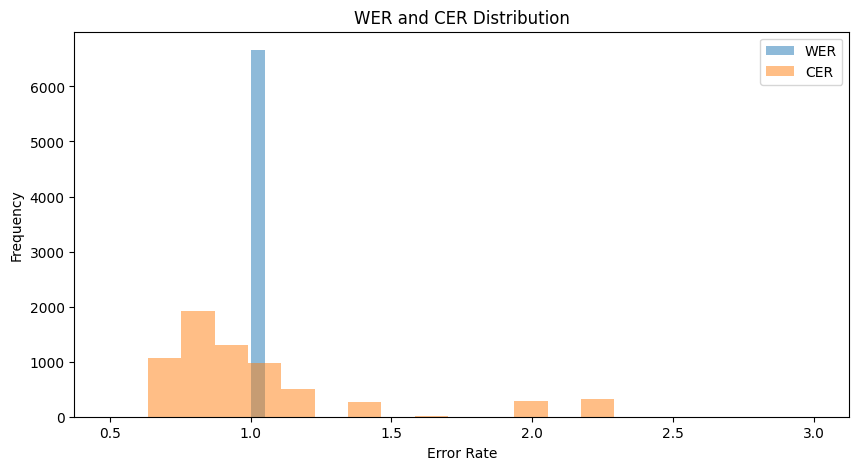

Average Confidence Score: 0.9846254316168743
Confidence Interval: 0.07090354868421878
Overall Quality Score: 3.678267527398289


In [40]:
import pandas as pd
import numpy as np
import jiwer # Import the jiwer module directly
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("overview-of-recordings.csv")

# Calculate WER and CER
def calculate_wer_cer(predicted_phrase, reference_phrase):
    # Use jiwer.wer and jiwer.cer directly
    wer = jiwer.wer(reference_phrase, predicted_phrase)  # Note the order of arguments
    cer = jiwer.cer(reference_phrase, predicted_phrase)  # Note the order of arguments
    return wer, cer

wer_list = []
cer_list = []
for index, row in data.iterrows():
    wer, cer = calculate_wer_cer(row['audio_clipping'], row['prompt'])
    wer_list.append(wer)
    cer_list.append(cer)

data['WER'] = wer_list
data['CER'] = cer_list

# Calculate average confidence score
average_confidence = data['audio_clipping:confidence'].mean()

# Calculate confidence interval
confidence_interval = np.std(data['audio_clipping:confidence'])

# Calculate overall quality score (assuming a scale of 1-5)
overall_quality = data['overall_quality_of_the_audio'].mean()

# Visualize WER and CER distribution
plt.figure(figsize=(10, 5))
plt.hist(data['WER'], bins=20, alpha=0.5, label='WER')
plt.hist(data['CER'], bins=20, alpha=0.5, label='CER')
plt.xlabel('Error Rate')
plt.ylabel('Frequency')
plt.legend()
plt.title('WER and CER Distribution')
plt.show()

# Print results
print("Average Confidence Score:", average_confidence)
print("Confidence Interval:", confidence_interval)
print("Overall Quality Score:", overall_quality)

In [42]:
import os
import speech_recognition as sr
import librosa
import numpy as np

def process_audio_files(audio_folder):
    """Processes audio files in a given folder.

    Args:
        audio_folder: Path to the folder containing audio files.
    """

    for filename in os.listdir(audio_folder):
        if filename.endswith('.wav'):  # Adjust file extension if needed
            file_path = os.path.join(audio_folder, filename)

            # Recognize speech
            recognizer = sr.Recognizer()
            with sr.AudioFile(file_path) as source:
                audio = recognizer.record(source)

            try:
                # Get the result object from recognize_google
                result = recognizer.recognize_google(audio, show_all=True)
                transcription = result['alternative'][0]['transcript']  # Access the transcription
                print(f"Transcription for {filename}: {transcription}")

                # Access confidence score from the result object
                confidence = result['alternative'][0]['confidence']
                print(f"Transcription Confidence for {filename}: {confidence}")

            except sr.UnknownValueError:
                print(f"Google Speech Recognition could not understand audio in {filename}")
            except sr.RequestError as e:
                print(f"Could not request results from Google Speech Recognition service; {e}")
            except (IndexError, KeyError):  # Handle cases where confidence might be missing
                print(f"Confidence score not available for {filename}")

            # Assess audio quality (using librosa features)
            audio_data, sample_rate = librosa.load(file_path)
            mfcc = librosa.feature.mfcc(y=audio_data, sr=sample_rate)
            # Use librosa.feature.rms instead of librosa.feature.rmse
            rmse = librosa.feature.rms(y=audio_data)
            zcr = librosa.feature.zero_crossing_rate(y=audio_data)

            # Assess background noise
            noise_energy = np.mean(rmse)
            background_noise_level = 10 * np.log10(noise_energy)
            print(f"Background Noise Level (dB) for {filename}: {background_noise_level}")

            # Assess speaker clarity
            speaker_clarity = np.mean(zcr)
            print(f"Speaker Clarity for {filename}: {speaker_clarity}")


# Example usage
audio_folder_path = "Medical Speech, Transcription, and Intent/recordings/validate"
process_audio_files(audio_folder_path)

Transcription for 1249120_44294866_49687487.wav: I had an accident and my wound was open when I arrived Hospital
Transcription Confidence for 1249120_44294866_49687487.wav: 0.91395861
Background Noise Level (dB) for 1249120_44294866_49687487.wav: -15.709844827651978
Speaker Clarity for 1249120_44294866_49687487.wav: 0.05716512889465875
Transcription for 1249120_44263136_106227417.wav: heart aches so much
Transcription Confidence for 1249120_44263136_106227417.wav: 0.85514182
Background Noise Level (dB) for 1249120_44263136_106227417.wav: -12.27723479270935
Speaker Clarity for 1249120_44263136_106227417.wav: 0.03480940193965517
Transcription for 1249120_44273314_24711015.wav: my heart hurts while I'm sad why
Transcription Confidence for 1249120_44273314_24711015.wav: 0.95765239
Background Noise Level (dB) for 1249120_44273314_24711015.wav: -12.622185945510864
Speaker Clarity for 1249120_44273314_24711015.wav: 0.0853305392795139
Transcription for 1249120_44273314_96055783.wav: my head is

KeyboardInterrupt: 

In [43]:
import speech_recognition as sr
import os
import speech_recognition as sr
import librosa
import numpy as np

def process_audio_files(audio_folder):
    """Processes audio files in a given folder and calculates KPIs.

    Args:
        audio_folder: Path to the folder containing audio files.

    Returns:
        A dictionary containing average scores for background noise,
        speaker clarity, and transcription confidence.
    """

    background_noise_levels = []
    speaker_clarities = []
    transcription_confidences = []

    for filename in os.listdir(audio_folder):
        if filename.endswith('.wav'):  # Adjust file extension if needed
            file_path = os.path.join(audio_folder, filename)

            # Recognize speech
            recognizer = sr.Recognizer()
            with sr.AudioFile(file_path) as source:
                audio = recognizer.record(source)

            try:
                # Pass show_all=True to get the confidence score
                result = recognizer.recognize_google(audio, show_all=True)

                # Check if result is a dictionary and contains 'alternative' key
                if isinstance(result, dict) and 'alternative' in result:
                    transcription = result['alternative'][0]['transcript']
                    confidence = result['alternative'][0]['confidence']  # Access confidence score from the dictionary
                    transcription_confidences.append(confidence)
                    #print(f"Transcription for {filename}: {transcription}") # Removed individual file print
                    #print(f"Transcription Confidence for {filename}: {confidence}") # Removed individual file print
                else:
                    print(f"Google Speech Recognition did not return confidence score for {filename}")
            except sr.UnknownValueError:
                print(f"Google Speech Recognition could not understand audio in {filename}")
            except sr.RequestError as e:
                print(f"Could not request results from Google Speech Recognition service; {e}")

            # Assess audio quality (using librosa features)
            audio_data, sample_rate = librosa.load(file_path)
            # Use librosa.feature.rms instead of librosa.feature.rmse
            rmse = librosa.feature.rms(y=audio_data)
            zcr = librosa.feature.zero_crossing_rate(y=audio_data)

            # Assess background noise
            noise_energy = np.mean(rmse)
            background_noise_level = 10 * np.log10(noise_energy)
            background_noise_levels.append(background_noise_level)
            #print(f"Background Noise Level (dB) for {filename}: {background_noise_level}") # Removed individual file print

            # Assess speaker clarity
            speaker_clarity = np.mean(zcr)
            speaker_clarities.append(speaker_clarity)
            #print(f"Speaker Clarity for {filename}: {speaker_clarity}") # Removed individual file print

    # Calculate and return average scores
    avg_background_noise = np.mean(background_noise_levels)
    avg_speaker_clarity = np.mean(speaker_clarities)
    avg_transcription_confidence = np.mean(transcription_confidences)

    return {
        "background_noise": avg_background_noise,
        "speaker_clarity": avg_speaker_clarity,
        "transcription_confidence": avg_transcription_confidence
    }

# Example usage
audio_folder_path = "Medical Speech, Transcription, and Intent/recordings/validate"
results = process_audio_files(audio_folder_path)

# Print the overall results
print("Overall Results:")
print(f"Average Background Noise Level (dB): {results['background_noise']}")
print(f"Average Speaker Clarity: {results['speaker_clarity']}")
print(f"Average Transcription Confidence: {results['transcription_confidence']}")

Google Speech Recognition could not understand audio in 1249120_44415714_12774994.wav
Google Speech Recognition could not understand audio in 1249120_44294866_74679338.wav
Google Speech Recognition could not understand audio in 1249120_44259428_34986999.wav
Google Speech Recognition could not understand audio in 1249120_44259428_71308387.wav
Google Speech Recognition could not understand audio in 1249120_44294866_106050928.wav
Google Speech Recognition could not understand audio in 1249120_44263136_34327747.wav
Google Speech Recognition could not understand audio in 1249120_44259428_56194683.wav
Google Speech Recognition could not understand audio in 1249120_44259428_28102523.wav
Google Speech Recognition could not understand audio in 1249120_44294866_21761084.wav
Google Speech Recognition could not understand audio in 1249120_44259428_54532216.wav
Overall Results:
Average Background Noise Level (dB): -13.74202520197088
Average Speaker Clarity: 0.06593704761847315
Average Transcription